In [1]:
import pandas as pd


In [2]:
df = pd.read_csv(r'C:\Users\anbun\Desktop\Portfolio projects\Finance-Project-GenAI\sec_outputs\financials.csv')


In [3]:
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100


In [4]:
# Fill NA values that result from pct_change calculations with 0 or an appropriate value
df.fillna(0, inplace=True)


In [5]:
df


,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Operating Cash Flow,Total Revenue YoY (%),Net Income YoY (%),Total Assets YoY (%),Total Liabilities YoY (%),Operating Cash Flow YoY (%),Revenue Growth (%),Net Income Growth (%)
0,Alphabet,2022,1.825270e+11,4.026900e+10,3.592680e+11,1.076330e+11,6.512400e+10,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000
1,Alphabet,2023,2.576370e+11,7.603300e+10,3.652640e+11,1.091200e+11,9.165200e+10,41.15,88.81,1.67,1.38,40.73,41.150076,88.812734
2,Alphabet,2024,2.828360e+11,5.997200e+10,4.023920e+11,1.190130e+11,9.149500e+10,9.78,-21.12,10.16,9.07,-0.17,9.780816,-21.123723
3,Amazon,2022,3.860640e+11,2.133100e+10,3.211950e+11,0.000000e+00,6.606400e+10,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000
4,Amazon,2023,4.698220e+11,3.336400e+10,4.205490e+11,0.000000e+00,4.632700e+10,21.70,56.41,30.93,0.00,-29.88,21.695367,56.410857
5,Amazon,2024,5.139830e+11,-2.722000e+09,4.626750e+11,0.000000e+00,4.675200e+10,9.40,-108.16,10.02,0.00,0.92,9.399517,-108.158494
6,Apple,2022,2.745150e+11,5.741100e+10,3.510020e+11,2.879120e+11,8.067400e+10,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000
7,Apple,2023,3.658170e+11,9.468000e+10,3.527550e+11,3.020830e+11,1.040380e+11,33.26,64.92,0.50,4.92,28.96,33.259385,64.916131
8,Apple,2024,3.943280e+11,9.980300e+10,3.525830e+11,2.904370e+11,1.221510e+11,7.79,5.41,-0.05,-3.86,17.41,7.793788,5.410858
9,Meta,2022,8.596500e+10,2.914600e+10,1.659870e+11,4.110800e+10,3.874700e+10,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000


In [6]:
# Optionally, you could summarize these findings for each company
summary = df.groupby('Company').agg({
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean'
}).reset_index()

print("\nYear-over-Year Average Growth Rates (%):")
print(summary)



Year-over-Year Average Growth Rates (%):
     Company  Revenue Growth (%)  Net Income Growth (%)
0   Alphabet           16.976964              22.563004
1     Amazon           10.364961             -17.249212
2      Apple           13.684391              23.442330
3       Meta           12.021086              -1.997771
4  Microsoft            8.279367               6.065639
5    Netflix            8.422504              24.358169
6     Nvidia           20.542077              23.302077
7      Tesla           40.674422             264.323205


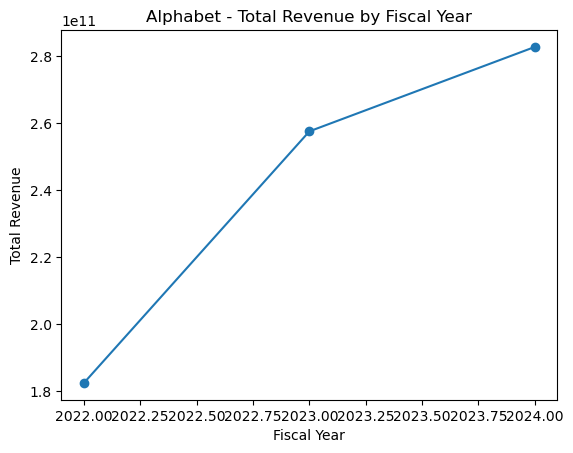

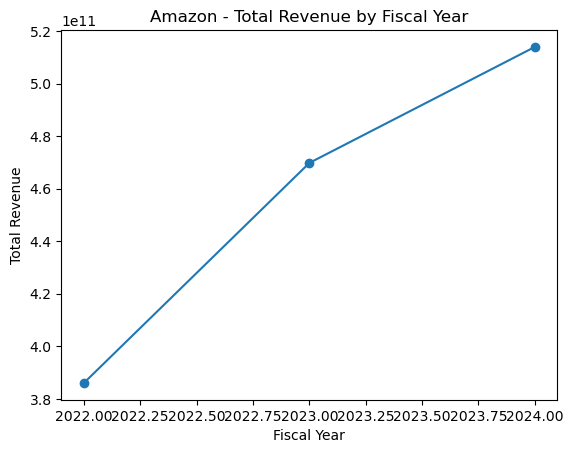

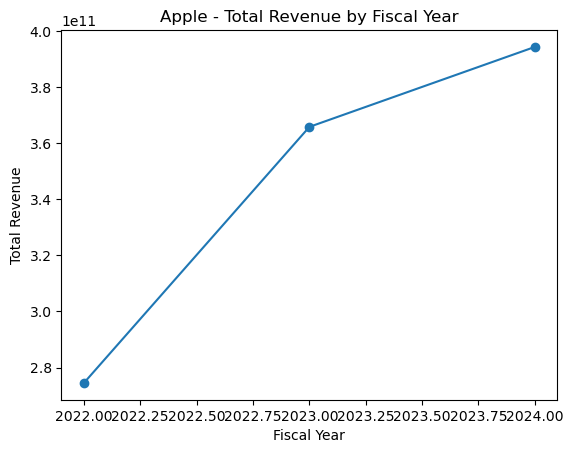

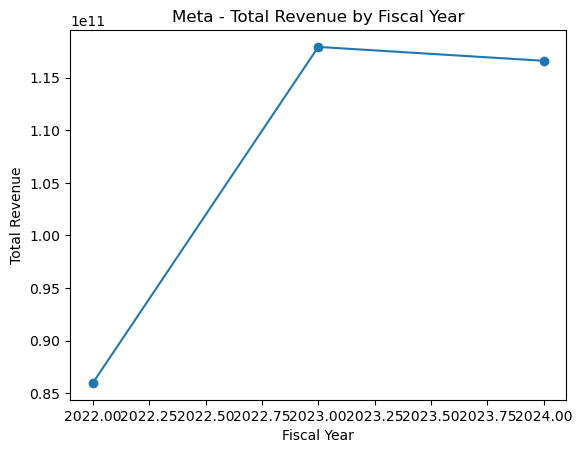

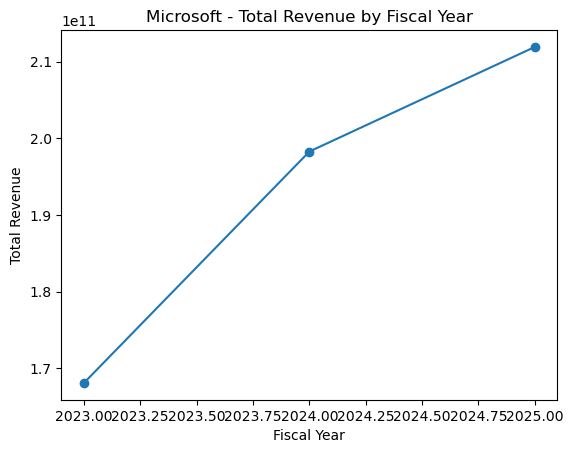

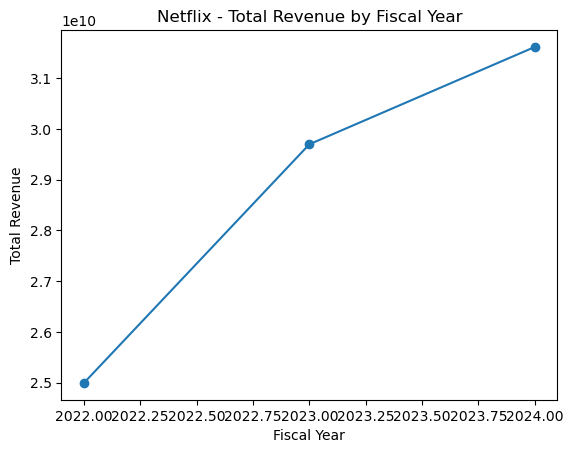

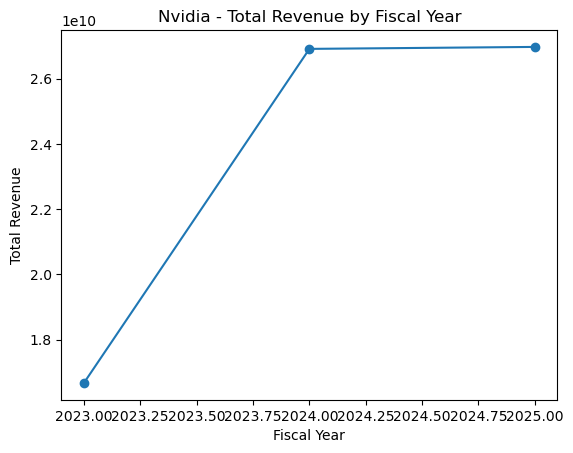

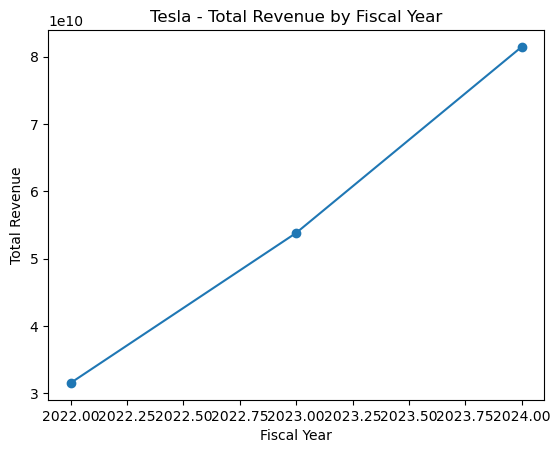

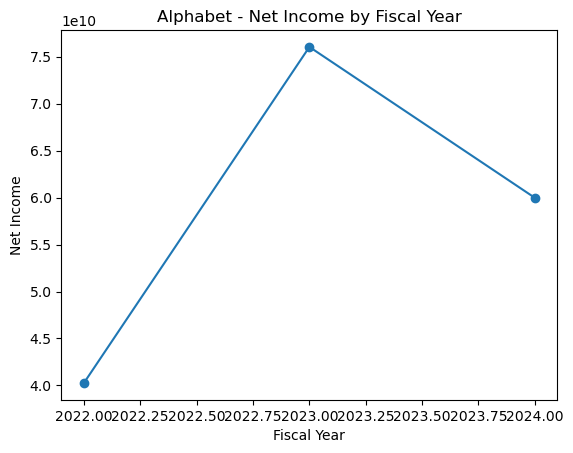

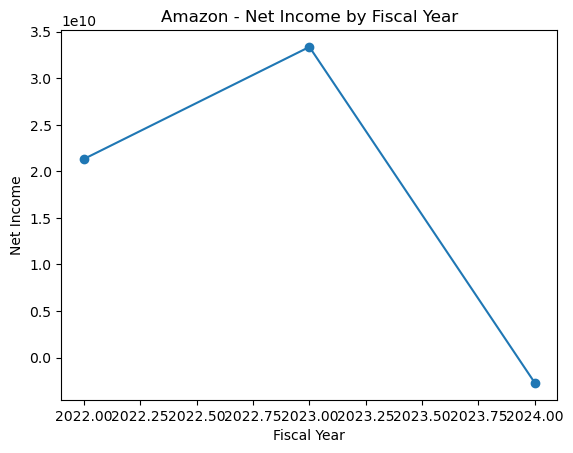

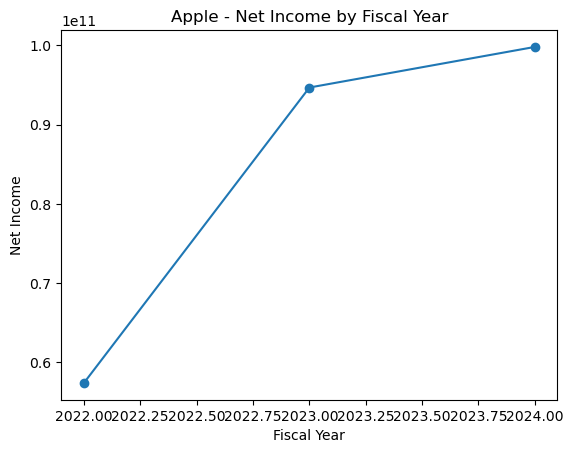

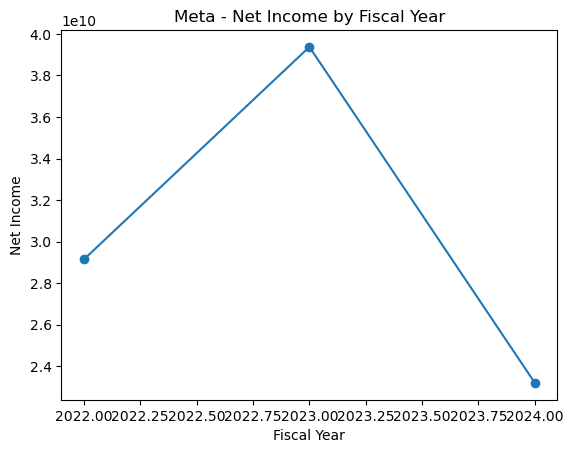

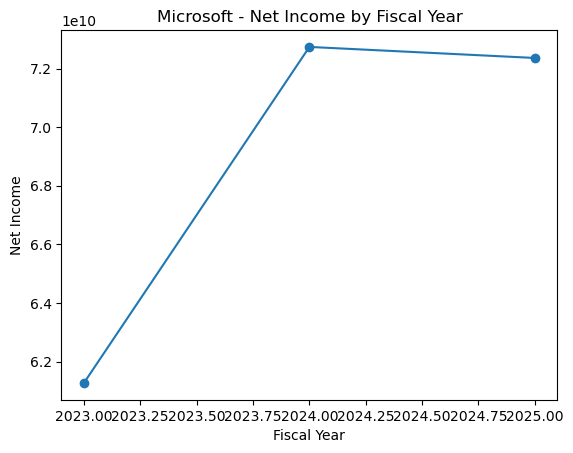

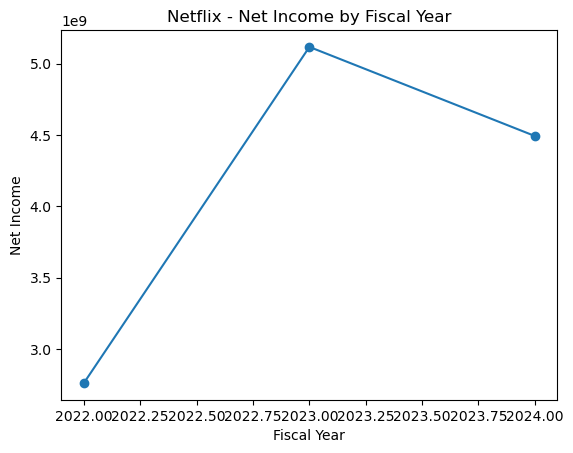

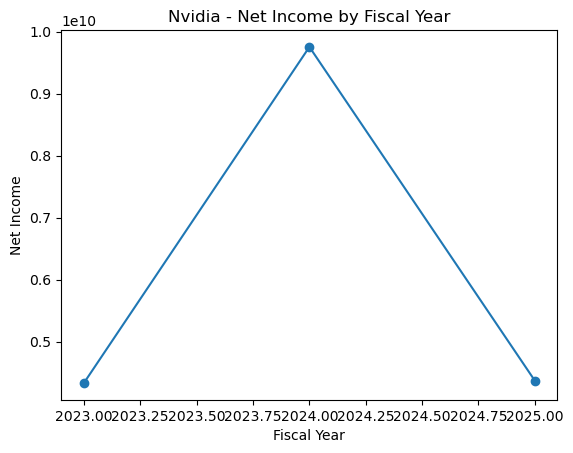

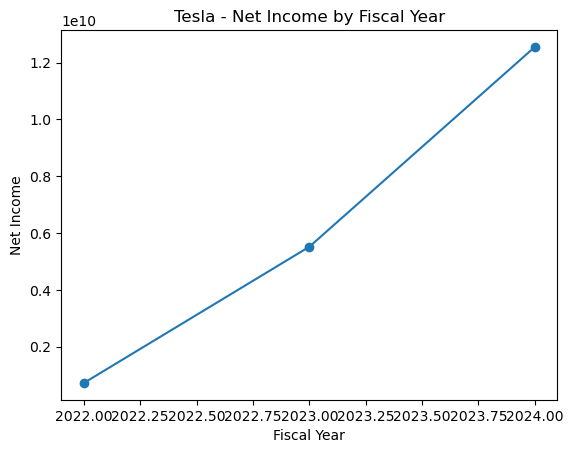

In [7]:
import matplotlib.pyplot as plt

# plot revenue and net income trends for each company
for metric in ['Total Revenue', 'Net Income']:
    for company in df['Company'].unique():
        sub = df[df['Company'] == company].sort_values('Fiscal Year')
        plt.figure()
        plt.plot(sub['Fiscal Year'], sub[metric], marker='o')
        plt.title(f'{company} - {metric} by Fiscal Year')
        plt.xlabel('Fiscal Year')
        plt.ylabel(metric)
        plt.show()


Apple → revenue climbs every year from 2022 → 2024; net income also rises, though more gently after 2023.

Microsoft → revenue keeps going up, but net income rises in 2024 then dips slightly in 2025.

Tesla → both revenue and net income shoot up quickly, showing very fast growth compared to Apple and Microsoft.